## End to End Machine Learning Project

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


### Preprocessing

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


---

### EDA

In [7]:
df.shape

(100, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [9]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


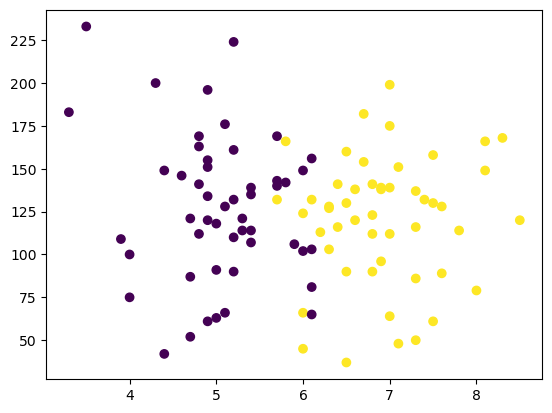

In [10]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

---

### Extract input and output variables

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [12]:
X = df[['cgpa', 'iq']]  # input features
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [13]:
y = df.drop(columns=X)  # output features
y.head()

,placement
0,1
1,0
2,0
3,1
4,0


---

### Train test split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [15]:
X_train

,cgpa,iq
32,7.0,139.0
80,4.9,196.0
24,4.7,121.0
10,6.0,45.0
79,6.5,90.0
...,...,...
98,6.3,103.0
66,6.9,96.0
52,7.0,175.0
18,4.0,100.0


In [16]:
y_train

,placement
32,1
80,0
24,0
10,1
79,1
...,...
98,1
66,1
52,1
18,0


In [17]:
X_test

,cgpa,iq
65,8.1,166.0
94,4.7,52.0
42,7.6,89.0
35,6.8,90.0
3,7.4,132.0
17,3.3,183.0
25,5.0,91.0
54,6.4,141.0
55,7.8,114.0
13,6.4,116.0


In [18]:
y_test

,placement
65,1
94,0
42,1
35,1
3,1
17,0
25,0
54,1
55,1
13,1


---

### Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_train

array([[ 0.96574014,  0.36890558],
       [-0.9677862 ,  1.79611948],
       [-1.15193157, -0.08179355],
       [ 0.04501331, -1.98474541],
       [ 0.50537673, -0.8579976 ],
       [ 0.32123136,  0.0684395 ],
       [-0.78364084,  0.09347834],
       [ 0.78159478,  0.41898326],
       [-1.05985889,  0.41898326],
       [ 1.88646698, -1.13342484],
       [-0.50742279, -0.43233731],
       [ 0.78159478, -0.03171586],
       [-0.9677862 , -1.58412396],
       [ 1.24195819,  0.3188279 ],
       [-0.23120474,  1.12007079],
       [-0.23120474,  0.46906094],
       [ 0.78159478, -0.30714311],
       [-0.9677862 ,  0.24371138],
       [-1.05985889,  0.96983775],
       [-0.13913205,  0.4440221 ],
       [-0.9677862 ,  0.66937166],
       [-1.5202223 ,  1.89627484],
       [ 1.05781283,  0.66937166],
       [-0.23120474,  0.39394442],
       [-1.05985889, -0.30714311],
       [-0.69156815,  0.91976007],
       [ 0.96574014, -1.50900744],
       [-0.59949547, -0.25706543],
       [ 0.50537673,

In [23]:
X_test = scaler.transform(X_test)

In [24]:
X_test

array([[ 1.97853966,  1.04495427],
       [-1.15193157, -1.80947353],
       [ 1.51817624, -0.88303644],
       [ 0.78159478, -0.8579976 ],
       [ 1.33403088,  0.1936337 ],
       [-2.44094914,  1.47061456],
       [-0.87571352, -0.83295875],
       [ 0.41330404,  0.41898326],
       [ 1.70232161, -0.25706543],
       [ 0.41330404, -0.20698775]])

---

### Train the model

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression()

In [27]:
# training
clf.fit(X_train, y_train)

c:\Users\HP\anaconda3\envs\Learning\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
# predictions
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test, y_pred)

1.0

In [31]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

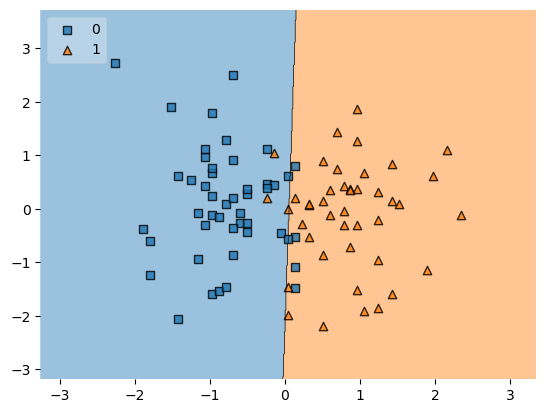

In [ ]:
# plotting decision regions
plot_decision_regions(X_train, y_train.values.ravel(), clf=clf, legend=2)

In [46]:
import pickle

In [ ]:
pickle.dump(clf, open('model.pkl', 'wb'))  # export model